In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/train.zip','r') as f:
  f.extractall()

In [0]:
import os

In [7]:
print(os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/'))

['test.zip', 'train.zip', 'test', 'train', 'CNN_R8_Project1.ipynb']


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import cv2

In [10]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
x_train = []
y_train = []
x_test = []
y_test = []

In [0]:
for i in os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/train'):
    for j in os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/train/'+i+'/'):
        record = cv2.imread('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/train/'+i+'/'+j)
        x_train.append(cv2.resize(record,(28,28)))
        y_train.append(i)

In [0]:
for i in os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/test'):
    #for j in os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/test/'+i+'/'):
        record = cv2.imread('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/test/'+i)
        x_test.append(cv2.resize(record,(28,28)))

View sample Training data set

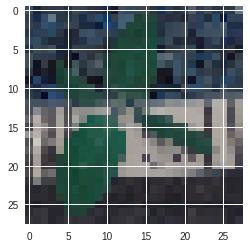

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

'Fat Hen'

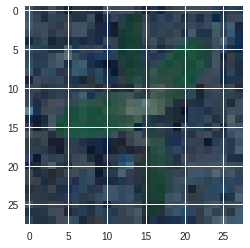

In [16]:
plt.imshow(x_train[1])

In [17]:
y_train[1]

'Fat Hen'

In [18]:
np.array(y_train).shape

(4748,)

In [19]:
np.array(x_train).shape

(4748, 28, 28, 3)

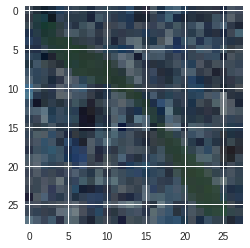

In [20]:
plt.imshow(x_train[4747])

In [21]:
y_train[4747]

'Common wheat'

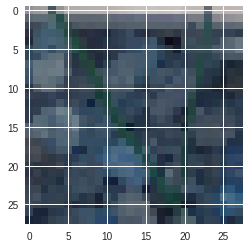

In [22]:
plt.imshow(x_train[2379])

In [23]:
y_train[2379]

'Loose Silky-bent'

View sample Test DataSet

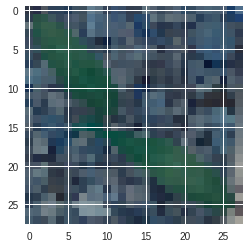

In [24]:
plt.imshow(x_test[0])

In [25]:
x_train[0].shape

(28, 28, 3)

In [26]:
x_test[0].shape

(28, 28, 3)

Convert to numpy array

In [0]:
X_test = np.array(x_test)

In [0]:
Y_test = np.array(y_test)

In [0]:
X = np.array(x_train)

In [0]:
Y = np.array(y_train)

In [83]:
pd.Series(np.array(y_train)).value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   384
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        220
dtype: int64

Convert Y to keras categorical variables

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [32]:
pd.Series(Y).value_counts()

6     654
3     611
8     516
10    496
5     475
1     390
11    384
2     287
0     263
9     231
4     221
7     220
dtype: int64

In [33]:
pd.Series(Y).unique()

array([ 5,  2, 11, 10,  0,  6,  9,  1,  8,  7,  3,  4])

In [34]:
Y = keras.utils.to_categorical(y=Y,num_classes=12,dtype='float32')
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
X.shape

(4748, 28, 28, 3)

Normalize X and Y

In [0]:
X = X / 255

Split X and Y into training and validation dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.3,random_state=7)

In [39]:
X_train.shape

(3323, 28, 28, 3)

In [40]:
X_val.shape

(1425, 28, 28, 3)

In [41]:
Y_train.shape

(3323, 12)

In [42]:
Y_val.shape

(1425, 12)

In [43]:
X.shape

(4748, 28, 28, 3)

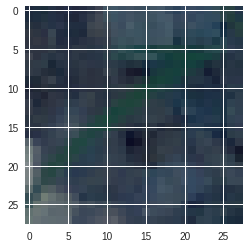

In [44]:
plt.imshow(X_train[0])

In [45]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

CNN model to predict the images

In [0]:
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, Conv3D, MaxPooling3D
from keras.models import Sequential

In [47]:
#Define model
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 3)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Conv2D(28, (3, 3)))
model.add(Activation('relu'))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=10, 
validation_data=(X_val, Y_val), callbacks=callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3323 samples, validate on 1425 samples
Epoch 1/10
3323/3323 [==============================] - 14s 4ms/step - loss: 2.2454 - acc: 0.2239 - val_loss: 1.8332 - val_acc: 0.3382
Epoch 2/10
3323/3323 [==============================] - 14s 4ms/step - loss: 1.5431 - acc: 0.4538 - val_loss: 1.4799 - val_acc: 0.4660
Epoch 3/10
3323/3323 [==============================] - 14s 4ms/step - loss: 1.1878 - acc: 0.5910 - val_loss: 1.2478 - val_acc: 0.5832
Epoch 4/10
3323/3323 [==============================] - 13s 4ms/step - loss: 0.8941 - acc: 0.7090 - val_loss: 1.0768 - val_acc: 0.6421
Epoch 5/10
3323/3323 [==============================] - 13s 4ms/step - loss: 0.6959 - acc: 0.7872 - val_loss: 1.0889 - val_acc: 0.6456
Epoch 6/10
3323/3323 [==============================] - 14s 4ms/step - loss: 0.4774 - acc: 0.8616 - val_loss: 1.1410 - val_acc: 0.6295
Epoch 7/10
3323/3323 [

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        784       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 28)        7084      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16128)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2064512   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

In [58]:
#Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Conv2D(28, (3, 3), input_shape=(28, 28, 3)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Conv2D(28, (3, 3)))
model1.add(Activation('relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model1.add(Dropout(0.25))

# Flatten
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(128))
model1.add(Activation('relu'))


# Prediction Layer
model1.add(Dense(12))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(X_train, Y_train, batch_size=32, epochs=15, 
validation_data=(X_val, Y_val), callbacks=callback_list)

Train on 3323 samples, validate on 1425 samples
Epoch 1/15
3323/3323 [==============================] - 11s 3ms/step - loss: 2.2157 - acc: 0.2525 - val_loss: 1.8716 - val_acc: 0.3221
Epoch 2/15
3323/3323 [==============================] - 11s 3ms/step - loss: 1.6224 - acc: 0.4276 - val_loss: 1.5701 - val_acc: 0.4344
Epoch 3/15
3323/3323 [==============================] - 11s 3ms/step - loss: 1.3792 - acc: 0.5164 - val_loss: 1.3897 - val_acc: 0.5046
Epoch 4/15
3323/3323 [==============================] - 11s 3ms/step - loss: 1.1953 - acc: 0.5892 - val_loss: 1.2286 - val_acc: 0.5754
Epoch 5/15
3323/3323 [==============================] - 11s 3ms/step - loss: 1.0165 - acc: 0.6599 - val_loss: 1.2071 - val_acc: 0.5937
Epoch 6/15
3323/3323 [==============================] - 11s 3ms/step - loss: 0.9211 - acc: 0.6876 - val_loss: 1.0925 - val_acc: 0.6211
Epoch 7/15
3323/3323 [==============================] - 11s 3ms/step - loss: 0.8316 - acc: 0.7222 - val_loss: 1.1122 - val_acc: 0.6133
Epoch 8

In [59]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 28)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 28)        7084      
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 28)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4032)              0         
__________

In [64]:
#Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Conv2D(28, (3, 3), input_shape=(28, 28, 3)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Conv2D(28, (3, 3)))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Flatten
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128))
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Dense(256))
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Dense(128))
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(0.25))

# Prediction Layer
model2.add(Dense(12))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(X_train, Y_train, batch_size=102, epochs=25, 
validation_data=(X_val, Y_val), callbacks=callback_list)

Train on 3323 samples, validate on 1425 samples
Epoch 1/25
3323/3323 [==============================] - 11s 3ms/step - loss: 2.4413 - acc: 0.1324 - val_loss: 2.4252 - val_acc: 0.1404
Epoch 2/25
3323/3323 [==============================] - 10s 3ms/step - loss: 2.3844 - acc: 0.1776 - val_loss: 2.2602 - val_acc: 0.2274
Epoch 3/25
3323/3323 [==============================] - 10s 3ms/step - loss: 2.1078 - acc: 0.2711 - val_loss: 1.8756 - val_acc: 0.3453
Epoch 4/25
3323/3323 [==============================] - 10s 3ms/step - loss: 1.8181 - acc: 0.3488 - val_loss: 1.6838 - val_acc: 0.3846
Epoch 5/25
3323/3323 [==============================] - 10s 3ms/step - loss: 1.6689 - acc: 0.3993 - val_loss: 1.6072 - val_acc: 0.3909
Epoch 6/25
3323/3323 [==============================] - 10s 3ms/step - loss: 1.5512 - acc: 0.4478 - val_loss: 1.4351 - val_acc: 0.4828
Epoch 7/25
3323/3323 [==============================] - 10s 3ms/step - loss: 1.4118 - acc: 0.4989 - val_loss: 1.3509 - val_acc: 0.4926
Epoch 8

In [65]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
activation_44 (Activation)   (None, 26, 26, 28)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 28)        7084      
_________________________________________________________________
activation_45 (Activation)   (None, 24, 24, 28)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4032)              0         
__________

In [66]:
X_test

array([[[[ 47,  53,  67],
         [ 39,  44,  68],
         [ 78,  85,  94],
         ...,
         [ 78,  95, 115],
         [ 26,  60, 101],
         [ 78, 109, 139]],

        [[ 46,  60,  77],
         [ 42,  79,  68],
         [ 44,  84,  74],
         ...,
         [ 46,  65,  88],
         [ 33,  62,  95],
         [ 31,  64, 111]],

        [[100, 116, 122],
         [ 42,  85,  71],
         [ 54,  94,  75],
         ...,
         [ 63,  87, 110],
         [ 66,  81,  96],
         [ 61,  76,  89]],

        ...,

        [[ 49,  66,  87],
         [ 74,  95, 111],
         [109, 121, 128],
         ...,
         [ 27,  74,  57],
         [ 33,  70,  57],
         [ 81,  80,  84]],

        [[ 82, 103, 119],
         [ 77,  98, 114],
         [115, 128, 137],
         ...,
         [ 47,  73,  68],
         [121, 129, 124],
         [ 92,  85,  88]],

        [[ 68,  91, 108],
         [ 56,  75,  94],
         [ 62,  75,  89],
         ...,
         [ 84,  92,  99],
        

In [67]:
X_test = X_test/255
X_test


array([[[[0.18431373, 0.20784314, 0.2627451 ],
         [0.15294118, 0.17254902, 0.26666667],
         [0.30588235, 0.33333333, 0.36862745],
         ...,
         [0.30588235, 0.37254902, 0.45098039],
         [0.10196078, 0.23529412, 0.39607843],
         [0.30588235, 0.42745098, 0.54509804]],

        [[0.18039216, 0.23529412, 0.30196078],
         [0.16470588, 0.30980392, 0.26666667],
         [0.17254902, 0.32941176, 0.29019608],
         ...,
         [0.18039216, 0.25490196, 0.34509804],
         [0.12941176, 0.24313725, 0.37254902],
         [0.12156863, 0.25098039, 0.43529412]],

        [[0.39215686, 0.45490196, 0.47843137],
         [0.16470588, 0.33333333, 0.27843137],
         [0.21176471, 0.36862745, 0.29411765],
         ...,
         [0.24705882, 0.34117647, 0.43137255],
         [0.25882353, 0.31764706, 0.37647059],
         [0.23921569, 0.29803922, 0.34901961]],

        ...,

        [[0.19215686, 0.25882353, 0.34117647],
         [0.29019608, 0.37254902, 0.43529412]

In [72]:
Z_pred = model2.predict(X_test)
Z_pred

array([[2.4595854e-04, 6.0928869e-05, 6.7236647e-04, ..., 2.1477214e-04,
        5.8664253e-04, 6.4690059e-01],
       [9.4572006e-10, 1.9467910e-08, 2.3398125e-10, ..., 5.3837587e-04,
        2.4953761e-07, 7.6169340e-07],
       [4.9176930e-07, 2.2811651e-05, 9.0123706e-07, ..., 1.7472355e-02,
        2.7442778e-05, 2.5021906e-03],
       ...,
       [1.3778010e-05, 6.1250637e-07, 5.8055343e-07, ..., 4.0484451e-06,
        9.9937785e-01, 6.8617941e-05],
       [3.5377070e-05, 1.2131153e-02, 1.1481371e-03, ..., 2.8977096e-01,
        8.2207692e-04, 7.9397811e-03],
       [6.6848547e-06, 9.5295483e-01, 1.0835658e-03, ..., 9.6587255e-04,
        4.8893220e-03, 3.2546930e-02]], dtype=float32)

In [86]:
Z_pred.shape

(794, 12)

In [89]:
for i in Z_pred:
  print(i)

[2.4595854e-04 6.0928869e-05 6.7236647e-04 6.0681062e-04 1.8671529e-04
 3.5039216e-01 2.8735181e-05 1.2020351e-05 9.2277965e-05 2.1477214e-04
 5.8664253e-04 6.4690059e-01]
[9.4572006e-10 1.9467910e-08 2.3398125e-10 9.9875057e-01 3.7657614e-07
 9.8655237e-06 1.2338262e-08 5.2317261e-04 1.7667073e-04 5.3837587e-04
 2.4953761e-07 7.6169340e-07]
[4.9176930e-07 2.2811651e-05 9.0123706e-07 9.7184610e-01 1.9524647e-05
 1.5961243e-03 7.1204164e-07 2.1845808e-03 4.3267906e-03 1.7472355e-02
 2.7442778e-05 2.5021906e-03]
[1.8403402e-05 7.9683457e-05 2.1120923e-05 1.5077639e-05 1.6799447e-07
 1.4565239e-04 6.8999296e-05 6.8125778e-06 2.8645528e-07 8.5772964e-04
 9.9796307e-01 8.2297414e-04]
[2.3859149e-02 1.6774299e-10 2.3823073e-07 1.4146447e-08 1.9702364e-03
 2.7630269e-05 9.7412282e-01 5.5636906e-07 1.8220968e-05 1.3992834e-09
 1.1725480e-06 4.3531259e-08]
[3.72092327e-05 1.13718247e-03 9.56713259e-01 1.08688789e-06
 1.44627134e-04 1.46999070e-03 5.13830992e-06 1.65498432e-06
 3.47774447e-04 1.

In [0]:
Y_test_1=[]
for i in Z_pred:
  Y_test_1.append(np.argmax(i))

In [105]:
Y_test_1 = np.array(Y_test_1)
Y_test_1.reshape(Y_test_1.shape[0],1)

array([[11],
       [ 3],
       [ 3],
       [10],
       [ 6],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 2],
       [ 6],
       [ 2],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [11],
       [ 2],
       [ 0],
       [ 6],
       [ 8],
       [ 8],
       [ 5],
       [ 6],
       [ 9],
       [ 5],
       [ 6],
       [ 6],
       [11],
       [ 3],
       [ 8],
       [ 5],
       [ 8],
       [ 6],
       [ 3],
       [ 6],
       [ 5],
       [ 6],
       [ 6],
       [11],
       [ 7],
       [ 3],
       [ 6],
       [ 2],
       [ 8],
       [ 6],
       [11],
       [ 6],
       [ 3],
       [ 5],
       [10],
       [ 6],
       [ 8],
       [ 7],
       [ 2],
       [ 6],
       [10],
       [11],
       [ 8],
       [ 2],
       [ 5],
       [11],
       [ 5],
       [ 6],
       [10],
       [ 1],
       [ 1],
       [ 7],
       [ 3],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [10],
       [ 3],

In [76]:
np.argmax(Z_pred[0])

11

In [81]:
le.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

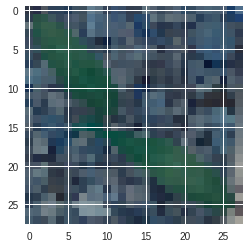

In [82]:
plt.imshow(X_test[0])

In [0]:
Y_test = le.inverse_transform(Y_test_1)

In [0]:
X_test_1=[]
for i in os.listdir('/content/gdrive/My Drive/AIML/Projects/CNN/Project1/test'):
    X_test_1.append(i)

In [107]:
X_test_1[0]

'93079d970.png'

In [109]:
final = pd.DataFrame({'file':X_test_1,'species':Y_test})
final.head()

,file,species
0,93079d970.png,Sugar beet
1,b31292706.png,Common Chickweed
2,29bab7cad.png,Common Chickweed
3,856f2910a.png,Small-flowered Cranesbill
4,1d0cbd819.png,Loose Silky-bent


In [0]:
final.to_csv("/content/gdrive/My Drive/AIML/Projects/CNN/Project1/Submission.csv",index=False)

In [116]:
os.listdir()

['.config', 'train', 'Submission.csv', 'gdrive', 'sample_data']

In [112]:
os.path

<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>

In [113]:
!pwd

/content
